In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

#### ZHVI

In [2]:
zhvi = pd.read_csv('../data/zillow/zip_maricopa_zhvi.csv')

#### ZORI

In [3]:
zori = pd.read_csv('../data/zillow/zip_maricopa_zori.csv')

## Map Rent Change and Rent

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)

In [6]:
geo = gpd.read_file('../data/geo/shapefiles/Phoenix_ZCTA_2.geojson')
geo['joinid'] = geo['GEOID20'].astype(int)
#geo.head(2)

In [7]:
zori_map = zori[['zip','2/29/20','2/28/23','Feb20Feb23']]

In [8]:
zori_map.describe()

,zip,2/29/20,2/28/23,Feb20Feb23
count,111.000000,90.000000,111.000000,90.000000
mean,85197.594595,1373.444444,1968.405405,0.394111
std,134.314717,227.576243,461.846775,0.058672
min,85003.000000,930.000000,1389.000000,0.240000
25%,85040.500000,1231.250000,1682.500000,0.360000
50%,85226.000000,1347.500000,1882.000000,0.390000
75%,85304.500000,1482.500000,2147.000000,0.430000
max,85396.000000,2083.000000,4947.000000,0.590000


In [9]:
zori_geo = pd.merge(geo,zori_map,how='left',left_on='joinid',right_on='zip')

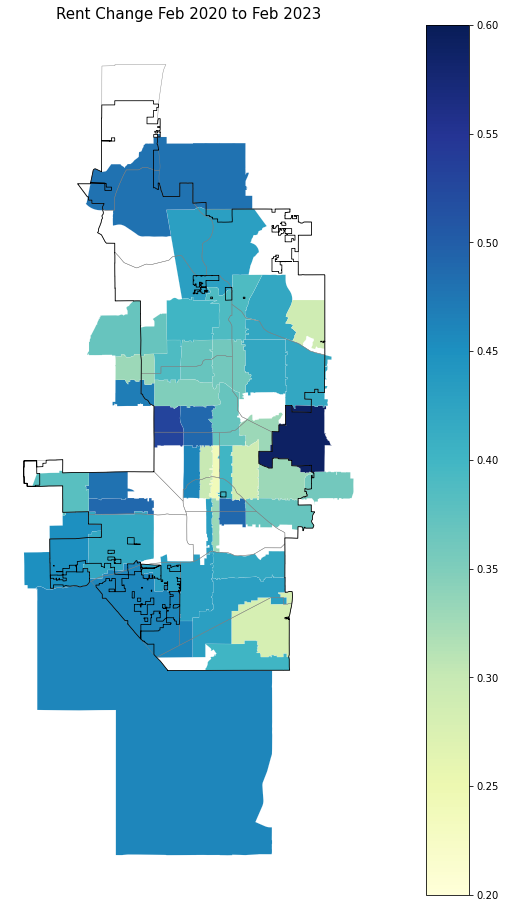

In [28]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.2,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
zori_geo.plot(column = 'Feb20Feb23', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.1, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.4)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.8)
fig.colorbar(sm)
ax.set_title(f'Rent Change Feb 2020 to Feb 2023', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_rentch_Feb2023.jpg', dpi = 300)

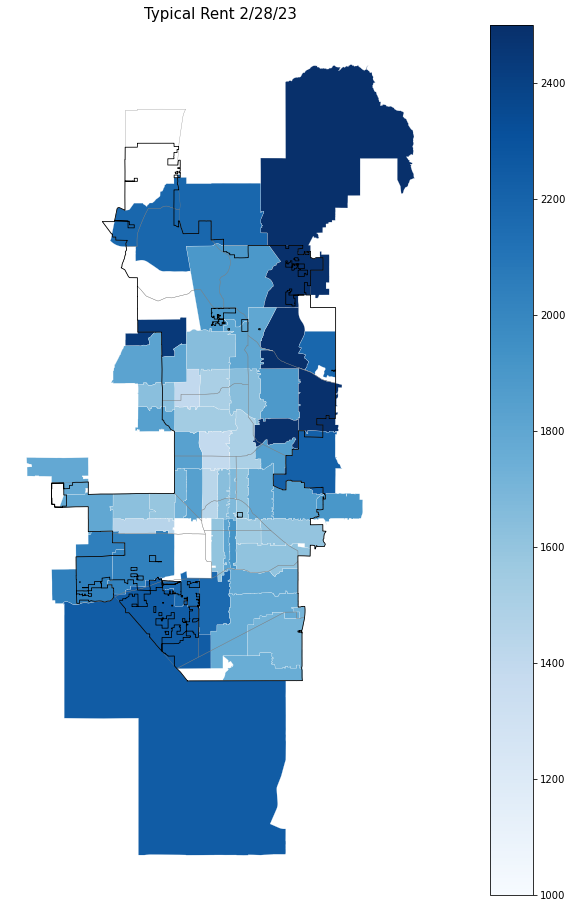

In [11]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
zori_geo.plot(column = '2/28/23', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.2, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.3)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.8)
fig.colorbar(sm)
ax.set_title(f'Typical Rent 2/28/23', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_rent_Feb23.jpg', dpi = 300)

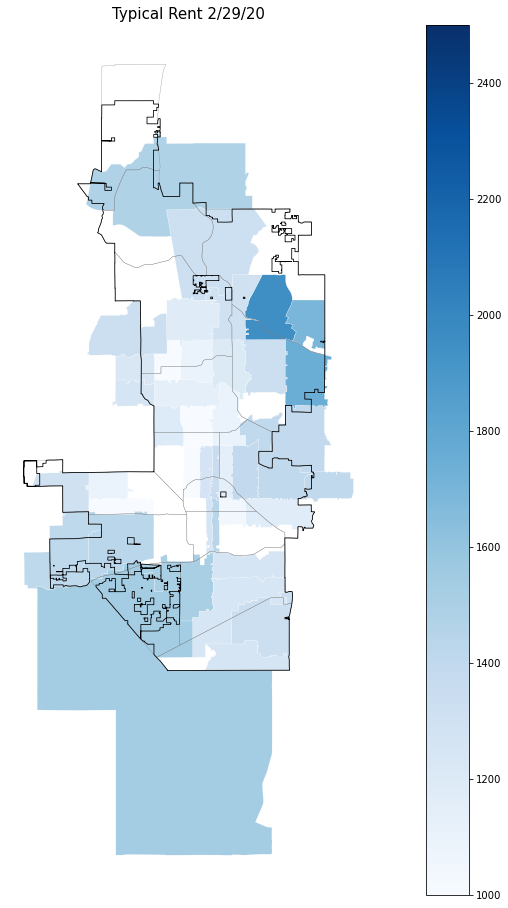

In [12]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
zori_geo.plot(column = '2/29/20', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.2, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.3)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.8)
fig.colorbar(sm)
ax.set_title(f'Typical Rent 2/29/20', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_rent_Feb20.jpg', dpi = 300)

## Map Change in Cost & Cost

In [13]:
zhvi = zhvi[['zip','2/29/20','2/28/23','FebFebChange']]

In [14]:
zhvi.describe()

,zip,2/29/20,2/28/23,FebFebChange
count,129.000000,1.250000e+02,1.290000e+02,125.000000
mean,85207.271318,3.421758e+05,4.953970e+05,0.433699
std,134.467047,1.527955e+05,2.526627e+05,0.067868
min,85003.000000,8.929980e+04,1.503267e+05,0.310933
25%,85044.000000,2.576904e+05,3.657437e+05,0.389328
50%,85250.000000,3.117337e+05,4.306357e+05,0.419531
75%,85320.000000,3.853327e+05,5.418774e+05,0.465374
max,85396.000000,1.401417e+06,2.442957e+06,0.743205


In [15]:
zhvi_map = pd.merge(geo,zhvi,how='left',left_on='joinid',right_on='zip')

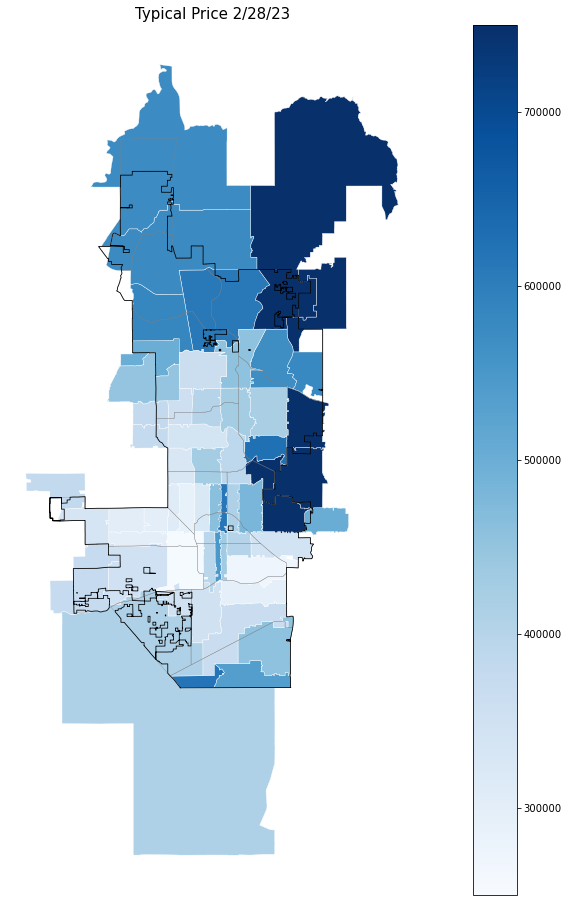

In [16]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=250000,vmax=750000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
zhvi_map.plot(column = '2/28/23', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.3)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.8)
fig.colorbar(sm)
ax.set_title(f'Typical Price 2/28/23', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_sale_Feb23.jpg', dpi = 300)

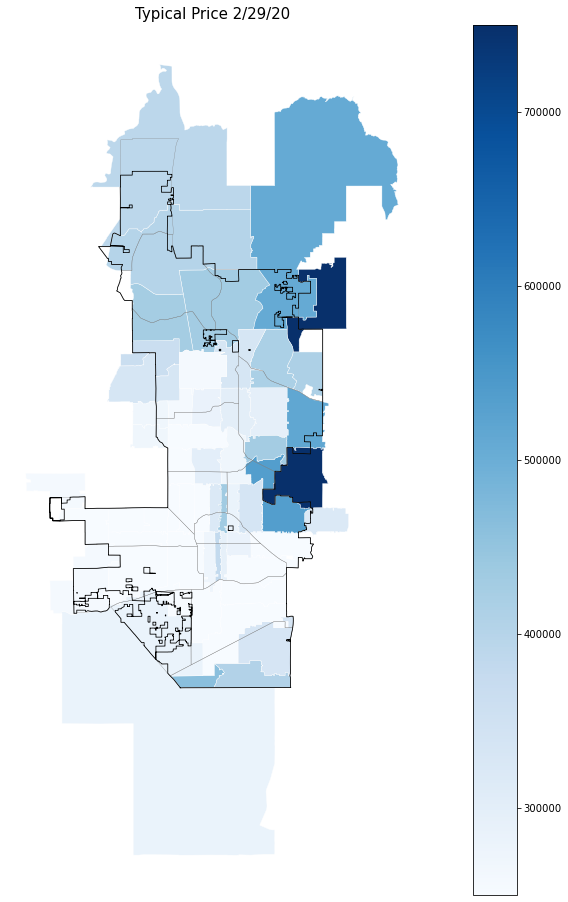

In [17]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=250000,vmax=750000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
zhvi_map.plot(column = '2/29/20', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.3)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.8)
fig.colorbar(sm)
ax.set_title(f'Typical Price 2/29/20', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_sale_Feb20.jpg', dpi = 300)

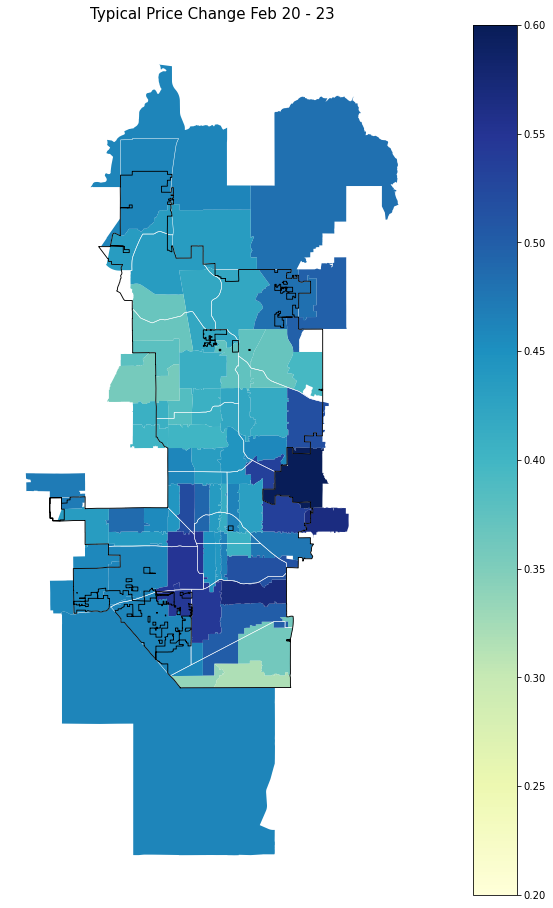

In [27]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.2,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
zhvi_map.plot(column = 'FebFebChange', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.5)
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=0.9)
fig.colorbar(sm)
ax.set_title(f'Typical Price Change Feb 20 - 23', color = 'k',  fontsize = 15)
plt.savefig('../viz/zillow_salech_Feb2023.jpg', dpi = 300)

#### archive stuff

date_cols = list(own_cost.columns[own_cost.columns.get_loc('2000-01-31'):])
cur_month = date_cols[-1]

plt.savefig(f'output/test/{month}.jpg', dpi = 400) # saving each scatter plot by month